In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#loading data set

df=pd.read_csv("ToyotaCorolla - MLR.CSV")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
# Data Cleaning and Preparation

print("<=== INFO ===>\n")
print(df.info())
print("<=== NULL VALUES COUNT ===>\n")
print(df.isnull().sum()) 
print("<=== Statistical Summary ===>\n")
print(df.describe())

<=== INFO ===>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB
None
<=== NULL VALUES COUNT ===>

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64
<=== Statistical Summary ===>

              Price    Age_08_04             KM           HP    Automatic 

In [4]:
# splitting target Y and X variables

yvari = df[["Price"]]
xvari = df.drop(columns=["Price"])

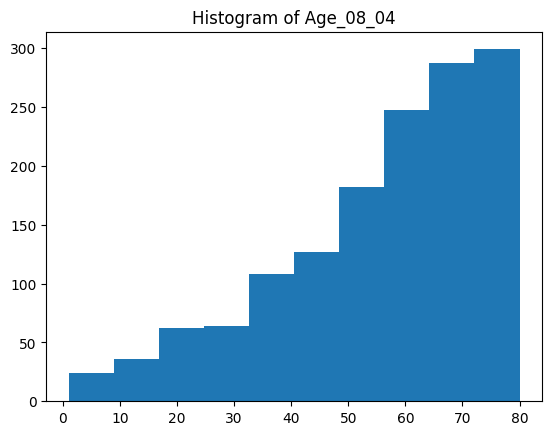

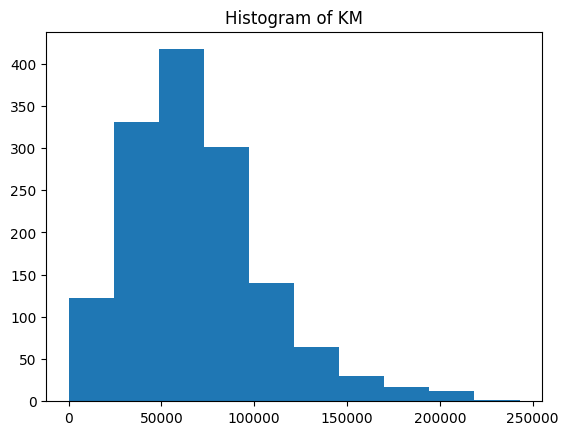

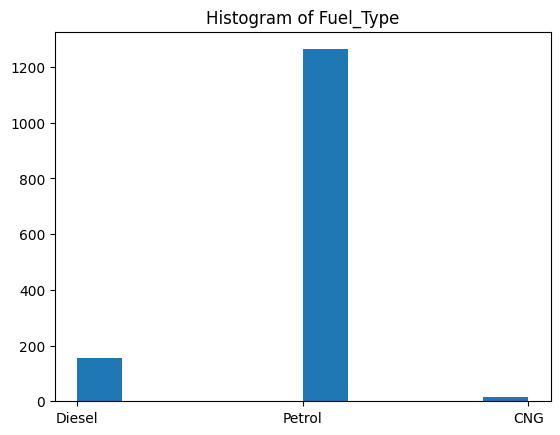

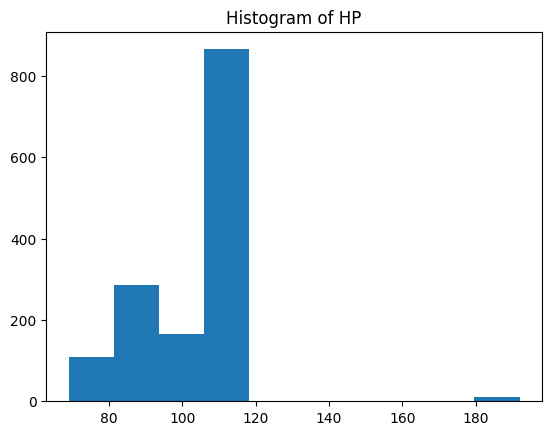

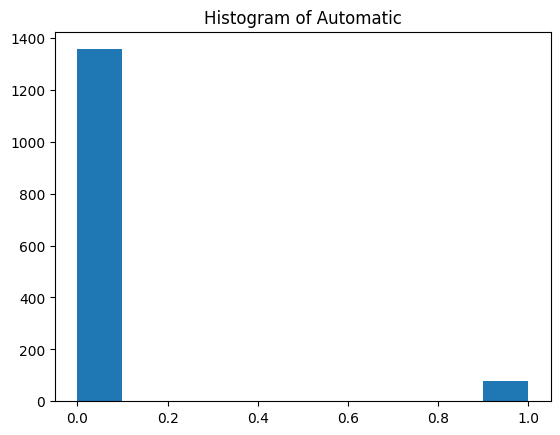

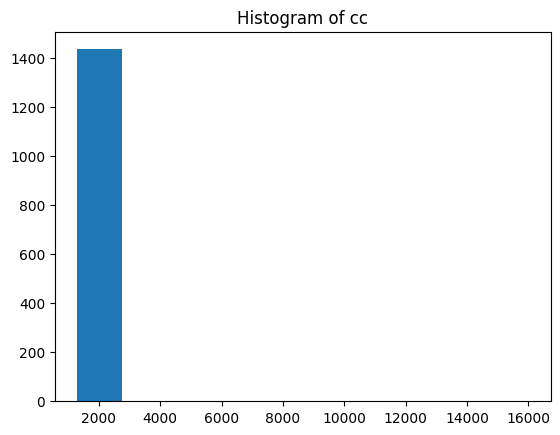

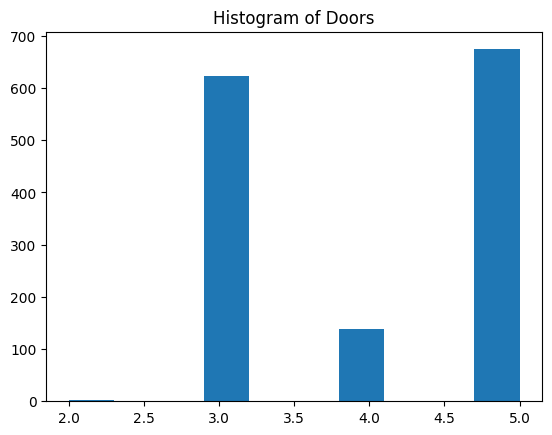

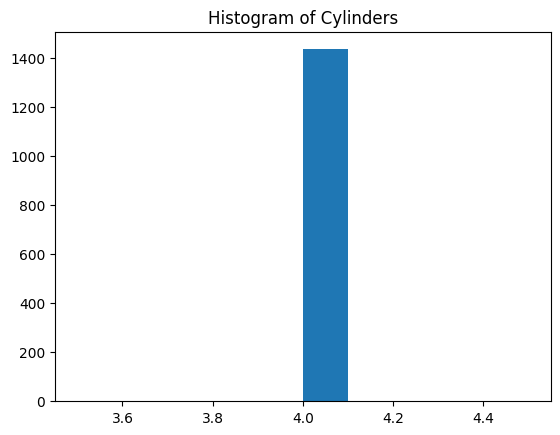

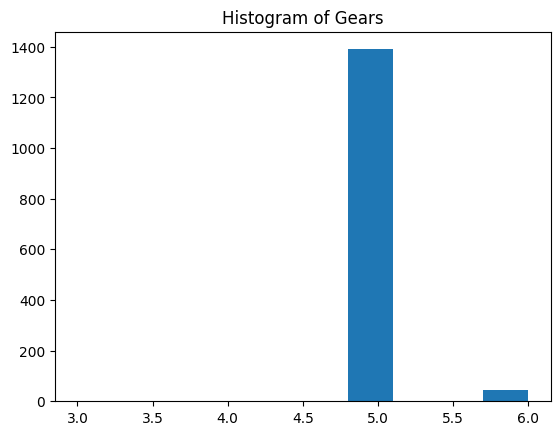

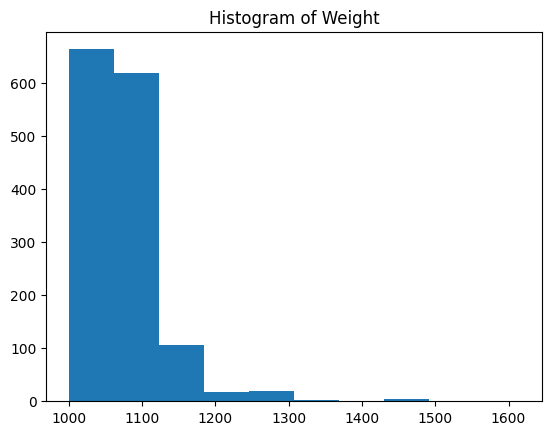

In [5]:
# Data visualisation
# Histograms

for x in xvari.columns:
    plt.hist(df[x])  
    plt.title(f"Histogram of {x}")
    plt.show()



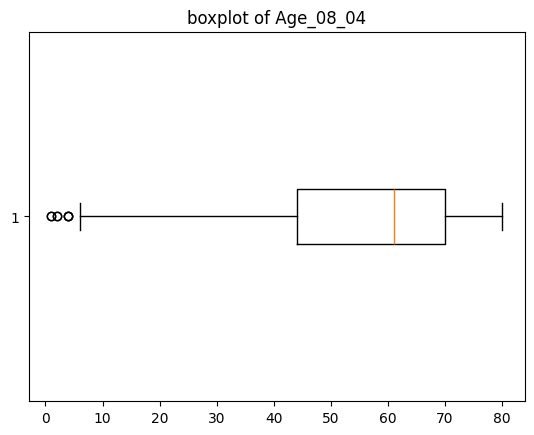

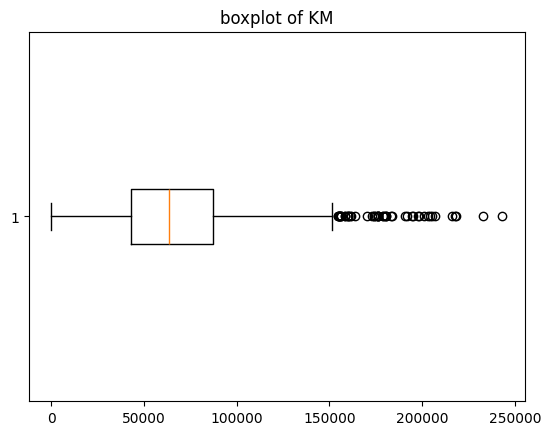

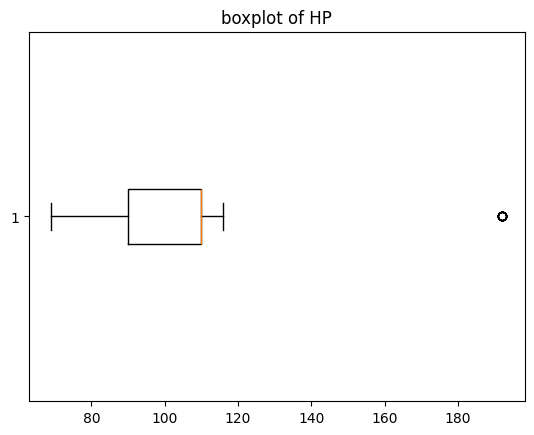

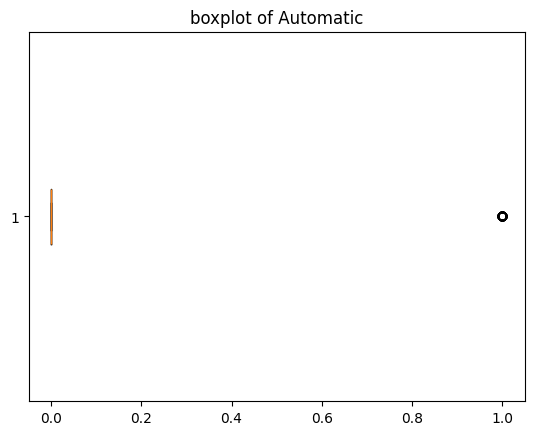

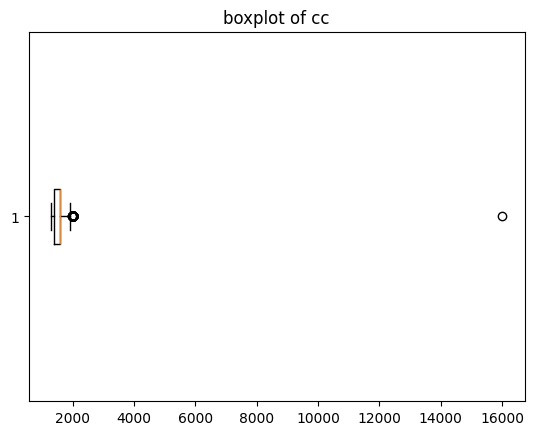

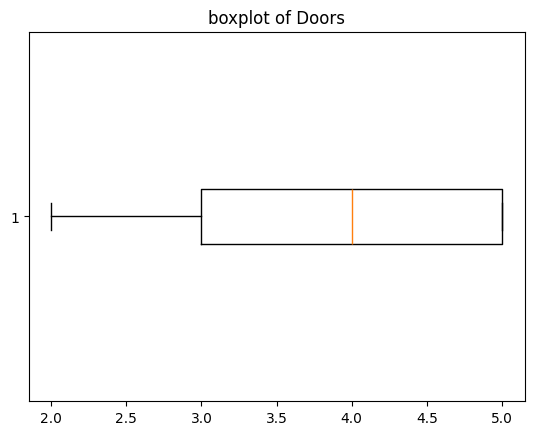

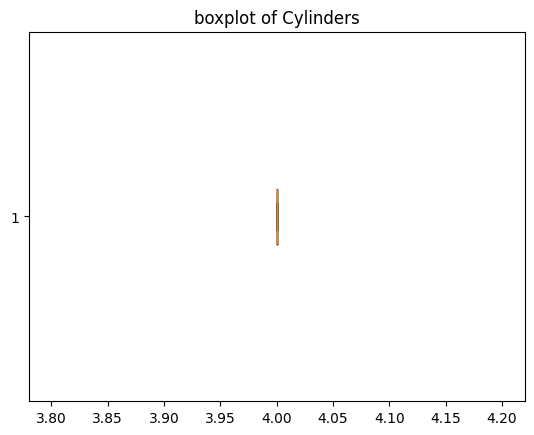

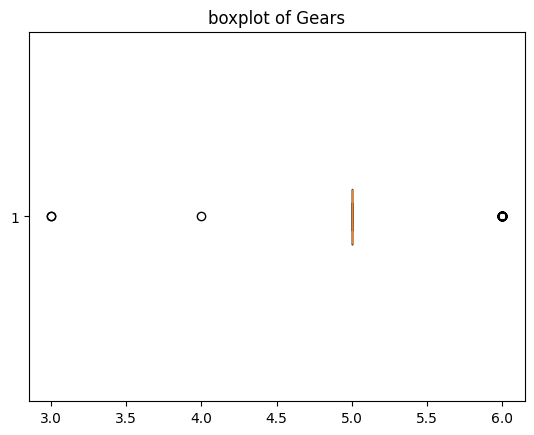

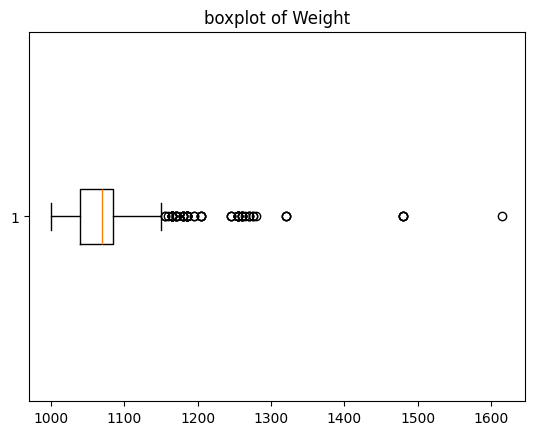

In [6]:
#box plot

for x in xvari.columns:
    if (x!= "Fuel_Type") :
        plt.boxplot(df[x],vert=False)  
        plt.title(f"boxplot of {x}")
        plt.show()

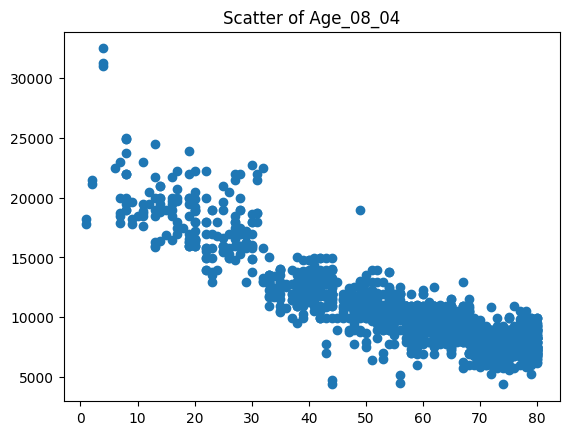

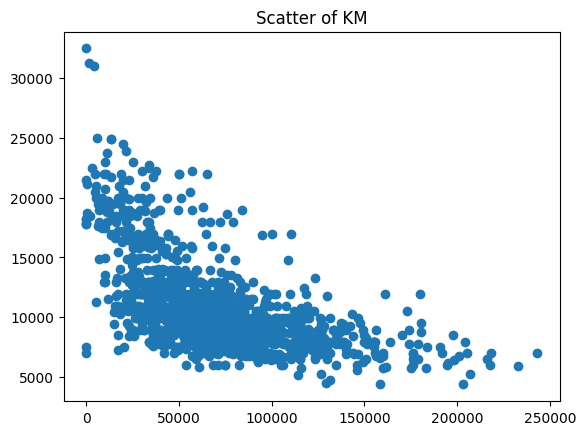

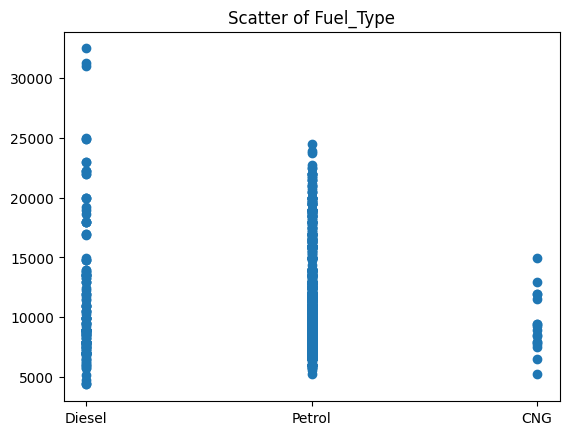

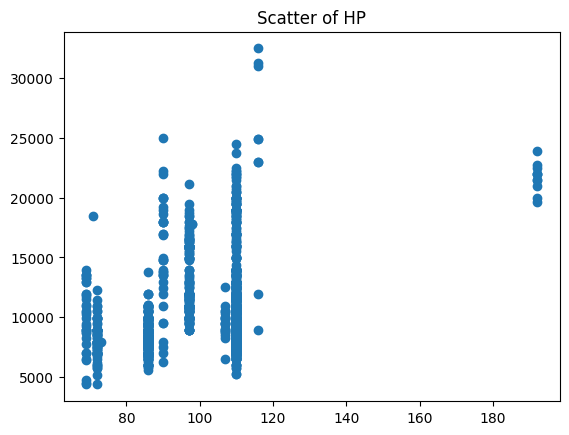

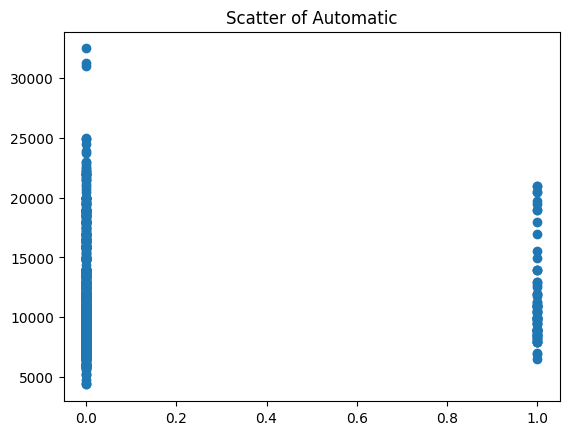

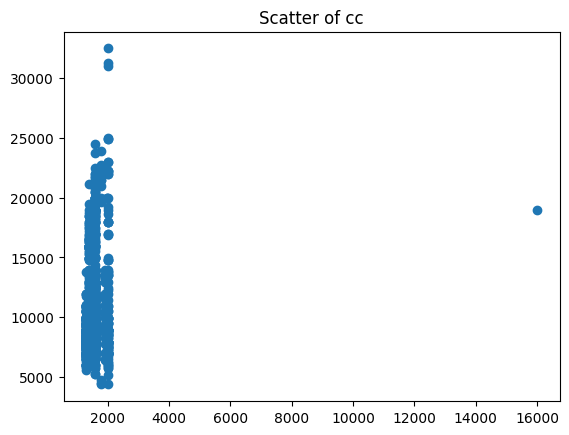

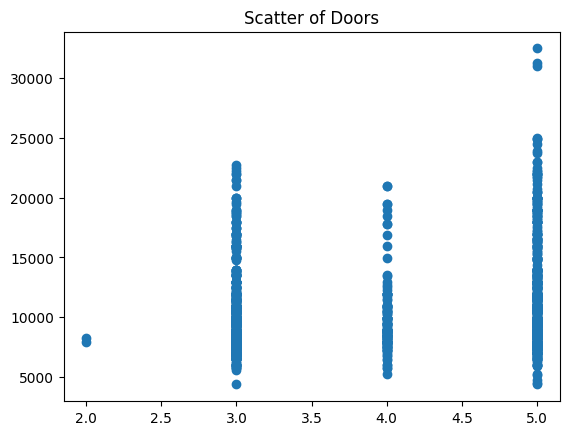

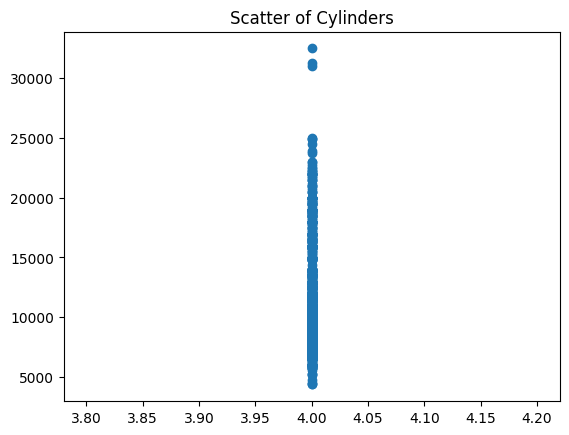

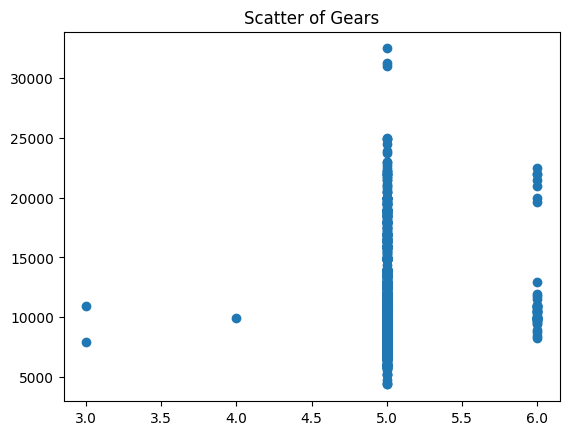

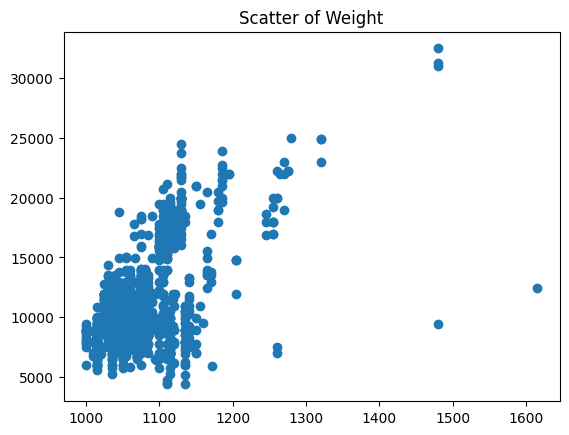

In [7]:
# scatterplot

for x in xvari.columns:
    plt.scatter(df[x],yvari)  
    plt.title(f"Scatter of {x}")
    plt.show()

In [8]:
#Data transformation

#label encoding for categorical variable "Fuel_Type"
from sklearn.preprocessing import LabelEncoder, StandardScaler
le=LabelEncoder()

xvari["Fuel_Type"] = le.fit_transform(xvari["Fuel_Type"])
xvari.head()


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,23,46986,1,90,0,2000,3,4,5,1165
1,23,72937,1,90,0,2000,3,4,5,1165
2,24,41711,1,90,0,2000,3,4,5,1165
3,26,48000,1,90,0,2000,3,4,5,1165
4,30,38500,1,90,0,2000,3,4,5,1170


In [9]:
#standard scaler for numerical variables

ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(xvari), columns=xvari.columns)
x.head()


,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,-1.771966,-0.574695,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,-1.771966,0.117454,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,-1.718184,-0.715386,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,-1.610620,-0.547650,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,-1.395491,-0.801028,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577


In [10]:
data=pd.concat([yvari,x],axis=1)
data

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,-1.771966,-0.574695,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
1,13750,-1.771966,0.117454,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
2,13950,-1.718184,-0.715386,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
3,14950,-1.610620,-0.547650,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.758561
4,13750,-1.395491,-0.801028,-2.337868,-0.768042,-0.242893,0.997419,-1.085139,0.0,-0.140425,1.853577
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,0.702015,-1.279939,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-0.901883
1432,10845,0.863362,-1.321120,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1433,8500,0.809579,-1.374036,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915
1434,7250,0.755797,-1.376703,0.354336,-1.035138,-0.242893,-0.652594,-1.085139,0.0,-0.140425,-1.091915


In [11]:
data.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [12]:
#correlation 
corr_with_price = data.corr()['Price'].abs().sort_values(ascending=False)
print(corr_with_price)

Price        1.000000
Age_08_04    0.876590
Weight       0.581198
KM           0.569960
HP           0.314990
Doors        0.185326
cc           0.126389
Gears        0.063104
Automatic    0.033081
Fuel_Type    0.022157
Cylinders         NaN
Name: Price, dtype: float64


In [13]:
#model 1
print(" --- MODEL-1 --- \n")

# splitting X and Y
x = data.drop(columns=["Price","Cylinders"]) # Cylinders col is droping,since no relation
y = data["Price"]

#splitting the data into Training and Testing (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

#fit model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


#training the model with training samples only
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#evaluation metrics
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Root Mean Squared Error --- :", np.round(rmse, 3))
print("--- R² Score --- :", np.round(r2, 3))


 --- MODEL-1 --- 

--- Root Mean Squared Error --- : 1359.147
--- R² Score --- : 0.845


In [14]:
#model 2
print(" --- MODEL-2 --- \n")

# splitting X and Y
x = data.drop(columns=["Price","Cylinders","Fuel_Type","Automatic", "Gears"]) # droping least correlation variable
y = data["Price"]

#splitting the data into Training and Testing (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

#fit model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


#training the model with training samples only
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#evaluation metrics
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Root Mean Squared Error --- :", np.round(rmse, 3))
print("--- R² Score --- :", np.round(r2, 3))


 --- MODEL-2 --- 

--- Root Mean Squared Error --- : 1337.144
--- R² Score --- : 0.85


In [15]:
#model 3
print(" --- MODEL-3 --- \n")

# splitting X and Y
x = data.drop(columns=["Price","Cylinders","Fuel_Type","Automatic","Gears","HP","Doors","cc",]) # droping least correlation variable
y = data["Price"]

#splitting the data into Training and Testing (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

#fit model
from sklearn.linear_model import LinearRegression
model=LinearRegression()


#training the model with training samples only
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

#evaluation metrics
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Root Mean Squared Error --- :", np.round(rmse, 3))
print("--- R² Score --- :", np.round(r2, 3))


 --- MODEL-3 --- 

--- Root Mean Squared Error --- : 1352.954
--- R² Score --- : 0.846


In [16]:
'''
    --- MODEL-1 --- 
--- Root Mean Squared Error --- : 1359.147
--- R² Score --- : 0.845
    
    --- MODEL-2 --- 
--- Root Mean Squared Error --- : 1337.144
--- R² Score --- : 0.85

     --- MODEL-3 --- 
--- Root Mean Squared Error --- : 1352.954
--- R² Score --- : 0.846

Among these models MODEL-2 is best . 
'''

'\n    --- MODEL-1 --- \n--- Root Mean Squared Error --- : 1359.147\n--- R² Score --- : 0.845\n    \n    --- MODEL-2 --- \n--- Root Mean Squared Error --- : 1337.144\n--- R² Score --- : 0.85\n\n     --- MODEL-3 --- \n--- Root Mean Squared Error --- : 1352.954\n--- R² Score --- : 0.846\n\nAmong these models MODEL-2 is best . \n'

In [17]:

# Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# model-1 X and Y
x = data.drop(columns=["Price","Cylinders"]) # Cylinders col is droping,since no relation
y = data["Price"]

#splitting the data into Training and Testing (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

# Create Lasso and Ridge objects
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

lasso.fit(x_train, y_train)  
ridge.fit(x_train, y_train)  

#  predictions
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

# Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("----  MODEL-1  ----\n")

print("---- Lasso Regression ----")
print("RMSE:", np.round(rmse_lasso, 3))
print("R² Score:", np.round(r2_lasso, 3))

print("\n---- Ridge Regression ----")
print("RMSE:", np.round(rmse_ridge, 3))
print("R² Score:", np.round(r2_ridge, 3))


----  MODEL-1  ----

---- Lasso Regression ----
RMSE: 1359.082
R² Score: 0.845

---- Ridge Regression ----
RMSE: 1358.94
R² Score: 0.845


In [18]:
# Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# performing Lasso and Ridge Regression on best model 
# model-2 X and Y
x = data.drop(columns=["Price","Cylinders","Fuel_Type","Automatic", "Gears"]) # droping least correlation variable
y = data["Price"]

#splitting the data into Training and Testing (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

# Create Lasso and Ridge objects
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

lasso.fit(x_train, y_train)  
ridge.fit(x_train, y_train)  

#  predictions
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

# Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("----  MODEL-2  ----\n")

print("---- Lasso Regression ----")
print("RMSE:", np.round(rmse_lasso, 3))
print("R² Score:", np.round(r2_lasso, 3))

print("\n---- Ridge Regression ----")
print("RMSE:", np.round(rmse_ridge, 3))
print("R² Score:", np.round(r2_ridge, 3))


----  MODEL-2  ----

---- Lasso Regression ----
RMSE: 1337.121
R² Score: 0.85

---- Ridge Regression ----
RMSE: 1337.197
R² Score: 0.85


In [19]:
# Lasso and Ridge Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# performing Lasso and Ridge Regression on best model 
# model-3 X and Y
x = data.drop(columns=["Price","Cylinders","Fuel_Type","Automatic","Gears","HP","Doors","cc",]) # droping least correlation variable
y = data["Price"]

#splitting the data into Training and Testing (80:20)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=100)

# Create Lasso and Ridge objects
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

lasso.fit(x_train, y_train)  
ridge.fit(x_train, y_train)  

#  predictions
y_pred_lasso = lasso.predict(x_test)
y_pred_ridge = ridge.predict(x_test)

# Lasso
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_lasso = r2_score(y_test, y_pred_lasso)

# Ridge
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("----  MODEL-3  ----\n")
print("---- Lasso Regression ----")
print("RMSE:", np.round(rmse_lasso, 3))
print("R² Score:", np.round(r2_lasso, 3))

print("\n---- Ridge Regression ----")
print("RMSE:", np.round(rmse_ridge, 3))
print("R² Score:", np.round(r2_ridge, 3))


----  MODEL-3  ----

---- Lasso Regression ----
RMSE: 1352.907
R² Score: 0.846

---- Ridge Regression ----
RMSE: 1352.929
R² Score: 0.846


In [20]:
'''
Lasso and Ridge Regression

    ----  MODEL-1  ----
---- Lasso Regression ----
RMSE: 1359.082
R² Score: 0.845
---- Ridge Regression ----
RMSE: 1358.94
R² Score: 0.845


    ----  MODEL-2  ----
---- Lasso Regression ----
RMSE: 1337.121
R² Score: 0.85
---- Ridge Regression ----
RMSE: 1337.197
R² Score: 0.85


    ----  MODEL-3  ----
---- Lasso Regression ----
RMSE: 1352.907
R² Score: 0.846
---- Ridge Regression ----
RMSE: 1352.929
R² Score: 0.846

'''

'\nLasso and Ridge Regression\n\n    ----  MODEL-1  ----\n---- Lasso Regression ----\nRMSE: 1359.082\nR² Score: 0.845\n---- Ridge Regression ----\nRMSE: 1358.94\nR² Score: 0.845\n\n\n    ----  MODEL-2  ----\n---- Lasso Regression ----\nRMSE: 1337.121\nR² Score: 0.85\n---- Ridge Regression ----\nRMSE: 1337.197\nR² Score: 0.85\n\n\n    ----  MODEL-3  ----\n---- Lasso Regression ----\nRMSE: 1352.907\nR² Score: 0.846\n---- Ridge Regression ----\nRMSE: 1352.929\nR² Score: 0.846\n\n'

In [21]:
#1. What is Normalization & Standardization and how is it helpful?

In [22]:
"""
-> Normalization and Standardization are techniques used to scale the data so that all features are in similar ranges.

> Normalization changes the values to a range between 0 and 1.
> It is useful when your values have very different units (Example: KM vs Weight).

> Standardization converts the data so that:
> Mean = 0
> Standard Deviation = 1

"""

'\n-> Normalization and Standardization are techniques used to scale the data so that all features are in similar ranges.\n\n> Normalization changes the values to a range between 0 and 1.\n> It is useful when your values have very different units (Example: KM vs Weight).\n\n> Standardization converts the data so that:\n> Mean = 0\n> Standard Deviation = 1\n\n'

In [23]:
#2. What techniques can be used to address multicollinearity in Multiple Linear Regression?

In [24]:
"""
-> Multicollinearity means two or more input features are strongly related to each other, 
  And this makes the model confused about which feature is truly affecting the output

-> Methods to Fix Multicollinearity
1. Remove one of the highly correlated columns,If two features give similar information, keep only one
2. Check VIF (Variance Inflation Factor),Helps to detect which column is causing multicollinearity
3. Use Regularization (Ridge or Lasso Regression) ,reduce the effect of multicollinearity by controlling large coefficients.

"""

'\n-> Multicollinearity means two or more input features are strongly related to each other, \n  And this makes the model confused about which feature is truly affecting the output\n\n-> Methods to Fix Multicollinearity\n1. Remove one of the highly correlated columns,If two features give similar information, keep only one\n2. Check VIF (Variance Inflation Factor),Helps to detect which column is causing multicollinearity\n3. Use Regularization (Ridge or Lasso Regression) ,reduce the effect of multicollinearity by controlling large coefficients.\n\n'